Traffic Volume Prediction using LSTM

Objective: Predict hourly traffic volume using an LSTM model trained on historical data from a city junction.


In [2]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


Uploading data

In [3]:
from google.colab import files

uploaded = files.upload()

Saving data traffic.xlsx to data traffic.xlsx


Loading and Preparing the Dataset

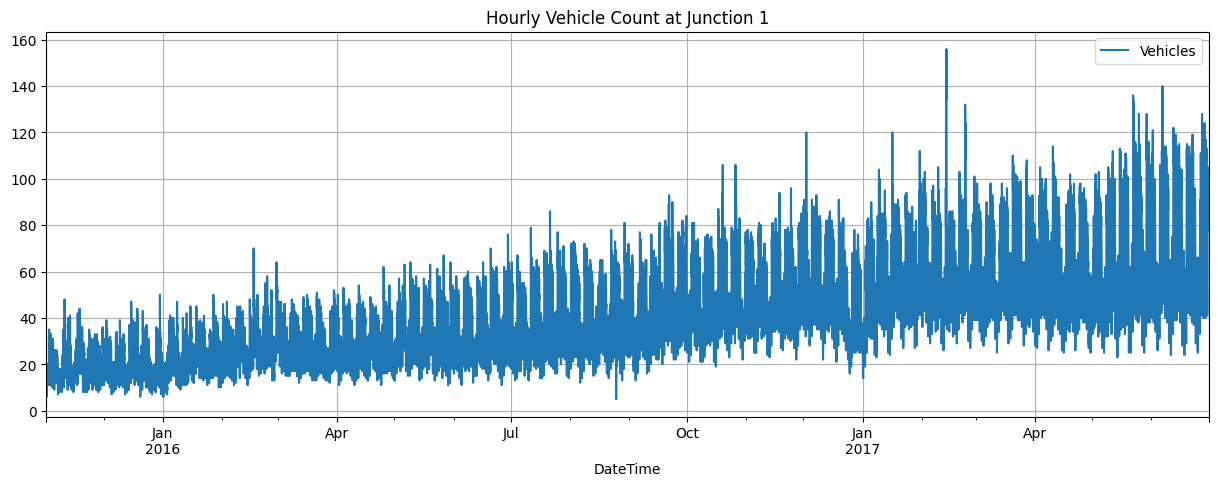

In [4]:
df = pd.read_excel('data traffic.xlsx')
df = df[df['Junction'] == 1]
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)
df = df[['Vehicles']]
df.plot(figsize=(15, 5))
plt.title("Hourly Vehicle Count at Junction 1")
plt.grid()
plt.show()

Data Scaling and Sequence Creation

In [6]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 24
X, y = create_sequences(scaled_data, SEQ_LEN)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

Model Building and Training

In [7]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0103 - val_loss: 0.0110
Epoch 2/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 3/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 4/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 5/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 6/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 7/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 8/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 9/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 10/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0011 - val_loss: 0.0019


Evaluation and Prediction

92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


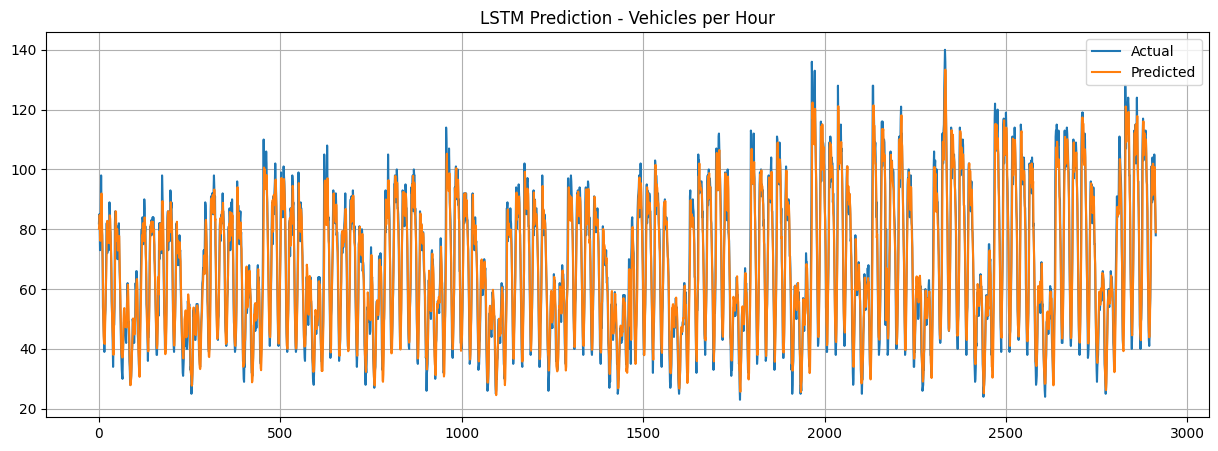

Mean Squared Error (MSE): 42.50
Mean Absolute Error (MAE): 4.64


In [8]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_true = scaler.inverse_transform(y_test)

plt.figure(figsize=(15, 5))
plt.plot(y_true, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title("LSTM Prediction - Vehicles per Hour")
plt.legend()
plt.grid()
plt.show()

mse = mean_squared_error(y_true, predicted)
mae = mean_absolute_error(y_true, predicted)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Predict Future Traffic

In [9]:
last_24 = df['Vehicles'].values[-24:].reshape(-1, 1)
last_24_scaled = scaler.transform(last_24)
input_seq = last_24_scaled.reshape((1, 24, 1))
predicted_scaled = model.predict(input_seq)
predicted_next = scaler.inverse_transform(predicted_scaled)

print(f"Predicted traffic for next hour: {predicted_next[0][0]:.2f} vehicles")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted traffic for next hour: 71.81 vehicles


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
